# Rain in Australia Prediction Using Logistic Regression, KNN, CART, and Random Forest

The aim of this project is to predict the next-day rain with some information relating to the weather. The target variable is binary. And through this project, binary classification will be carried out with various classifaction methods to find the best model that suits the case. Data exploration also will be done to identify the characteristics of the data.

## Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd

## Reading The Dataset

In [2]:
data=pd.read_csv("weatherAUS.csv",sep=",")
data.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


## Exploratory Data Analysis

### Dataset Shape

In [3]:
data.shape

(145460, 23)

This dataset contains 145460 rows and 23 columns

### Dataset Info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### Changing type of "Date" Column into datetime

In [5]:
data['Date']=pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

### Descriptive Statistics of Numerical Variables

In [6]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


### Descriptive Statistics of Categorical Variables

In [7]:
data.describe(include=['object'])

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,135134,134894,141232,142199,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,9915,11758,10838,110319,110316


### Creating Boxplot

Boxplot can be used to check outliers within the data visually and to identify the distribution of data

In [8]:
import matplotlib.pyplot as plt

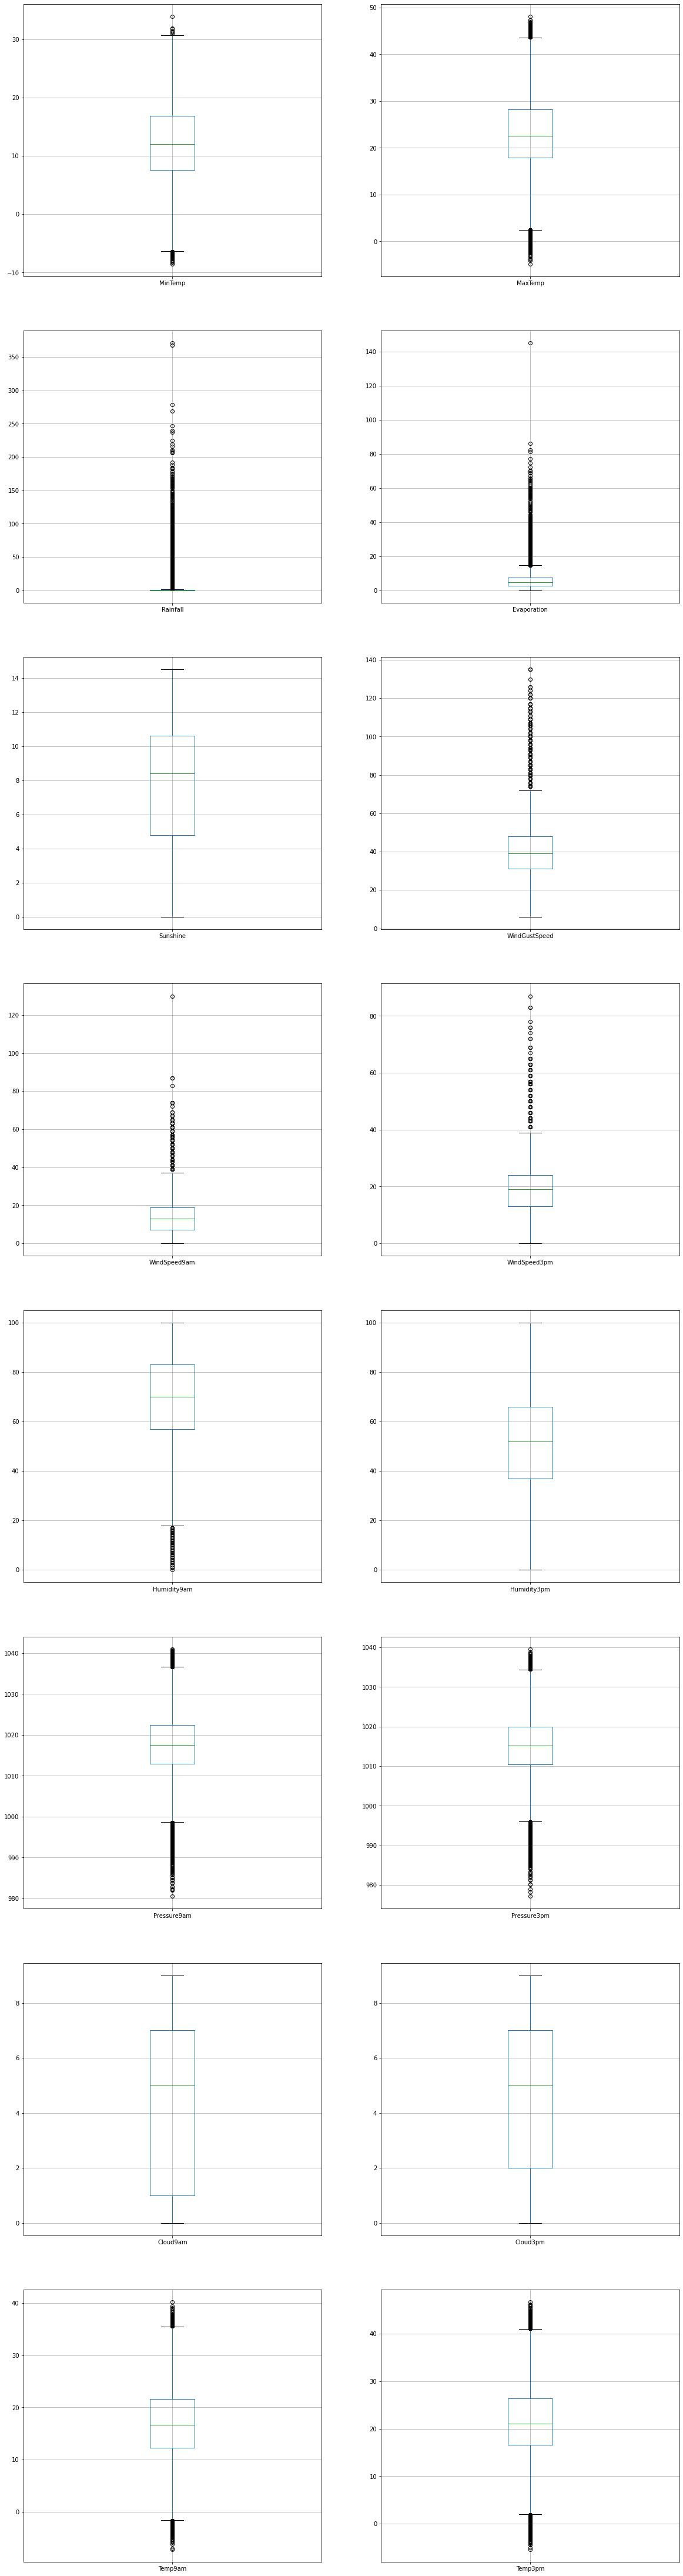

In [9]:
plt.figure(figsize=(20,80))

plt.subplot(8,2,1)
fig=data.boxplot(column='MinTemp')

plt.subplot(8,2,2)
fig=data.boxplot(column='MaxTemp')

plt.subplot(8,2,3)
fig=data.boxplot(column='Rainfall')

plt.subplot(8,2,4)
fig=data.boxplot(column='Evaporation')

plt.subplot(8,2,5)
fig=data.boxplot(column='Sunshine')

plt.subplot(8,2,6)
fig=data.boxplot(column='WindGustSpeed')

plt.subplot(8,2,7)
fig=data.boxplot(column='WindSpeed9am')

plt.subplot(8,2,8)
fig=data.boxplot(column='WindSpeed3pm')

plt.subplot(8,2,9)
fig=data.boxplot(column='Humidity9am')

plt.subplot(8,2,10)
fig=data.boxplot(column='Humidity3pm')

plt.subplot(8,2,11)
fig=data.boxplot(column='Pressure9am')

plt.subplot(8,2,12)
fig=data.boxplot(column='Pressure3pm')

plt.subplot(8,2,13)
fig=data.boxplot(column='Cloud9am')

plt.subplot(8,2,14)
fig=data.boxplot(column='Cloud3pm')

plt.subplot(8,2,15)
fig=data.boxplot(column='Temp9am')

plt.subplot(8,2,16)
fig=data.boxplot(column='Temp3pm')

plt.show()

From those boxplot graphs above, most numerical variables contain outliers.

### Creating Histogram to Check The Distribution of Data

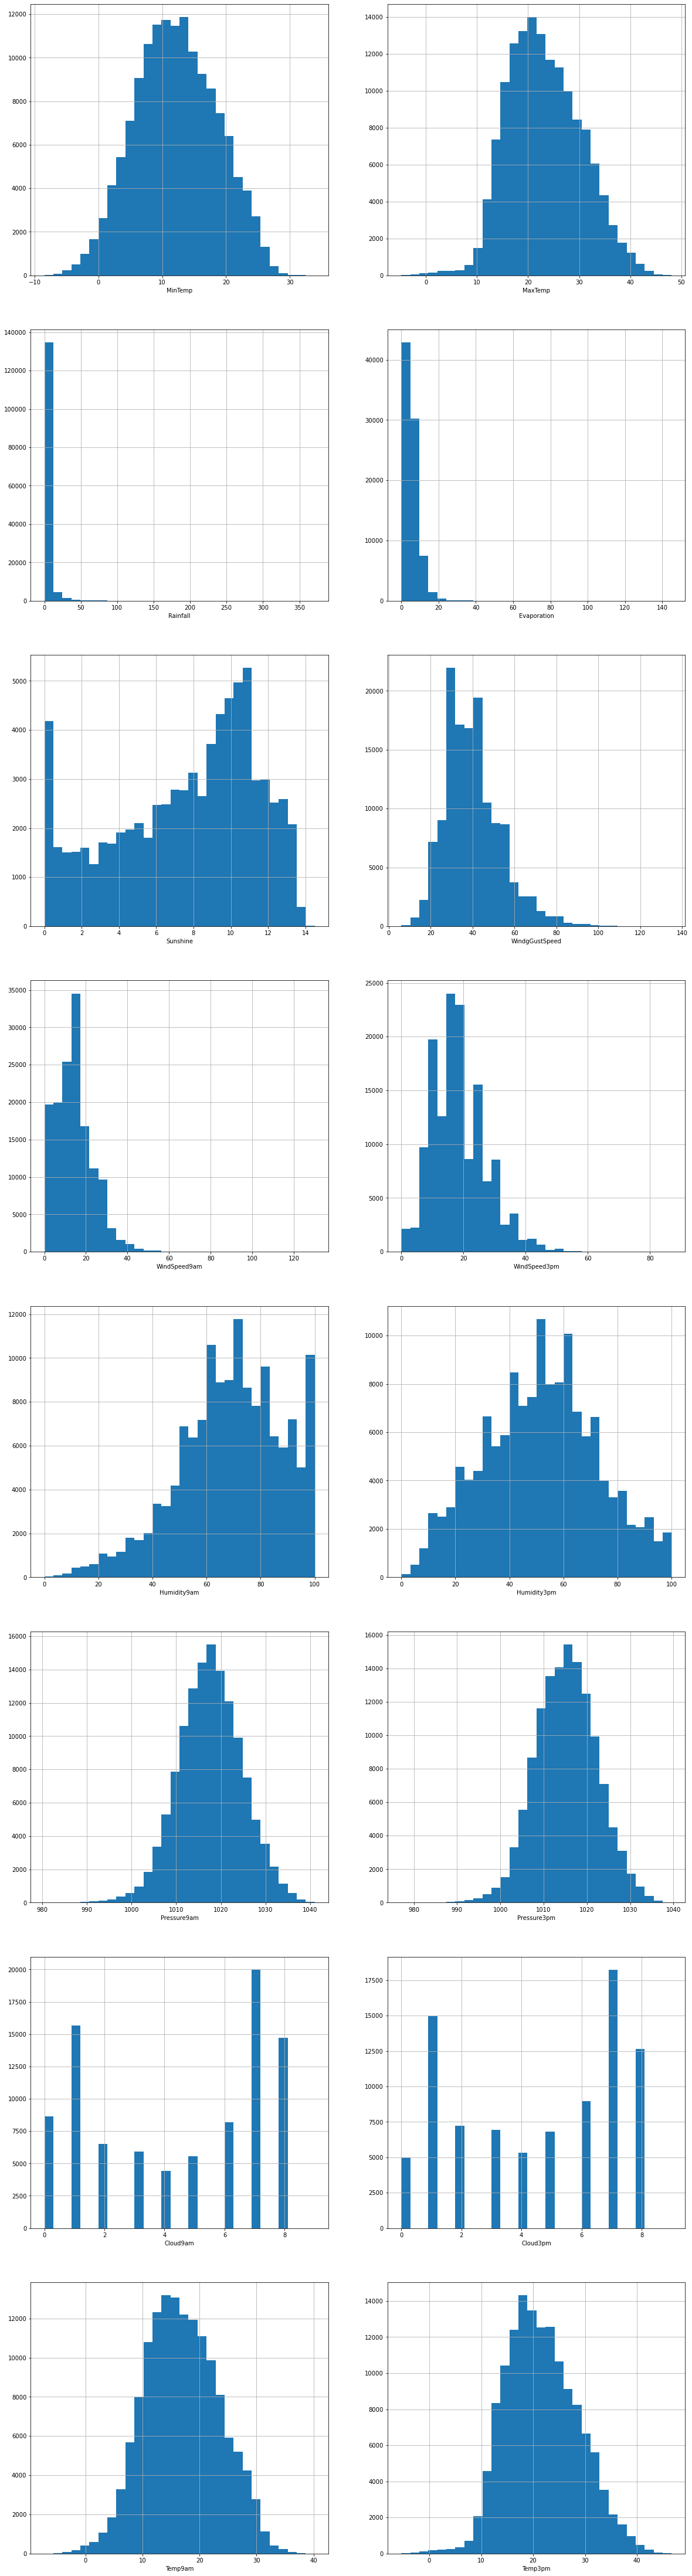

In [10]:
plt.figure(figsize=(20,80))

plt.subplot(8,2,1)
fig=data.MinTemp.hist(bins=30)
fig.set_xlabel('MinTemp')

plt.subplot(8,2,2)
fig=data.MaxTemp.hist(bins=30)
fig.set_xlabel('MaxTemp')

plt.subplot(8,2,3)
fig=data.Rainfall.hist(bins=30)
fig.set_xlabel('Rainfall')

plt.subplot(8,2,4)
fig=data.Evaporation.hist(bins=30)
fig.set_xlabel('Evaporation')

plt.subplot(8,2,5)
fig=data.Sunshine.hist(bins=30)
fig.set_xlabel('Sunshine')

plt.subplot(8,2,6)
fig=data.WindGustSpeed.hist(bins=30)
fig.set_xlabel('WindgGustSpeed')


plt.subplot(8,2,7)
fig=data.WindSpeed9am.hist(bins=30)
fig.set_xlabel('WindSpeed9am')

plt.subplot(8,2,8)
fig=data.WindSpeed3pm.hist(bins=30)
fig.set_xlabel('WindSpeed3pm')

plt.subplot(8,2,9)
fig=data.Humidity9am.hist(bins=30)
fig.set_xlabel('Humidity9am')

plt.subplot(8,2,10)
fig=data.Humidity3pm.hist(bins=30)
fig.set_xlabel('Humidity3pm')

plt.subplot(8,2,11)
fig=data.Pressure9am.hist(bins=30)
fig.set_xlabel('Pressure9am')

plt.subplot(8,2,12)
fig=data.Pressure3pm.hist(bins=30)
fig.set_xlabel('Pressure3pm')

plt.subplot(8,2,13)
fig=data.Cloud9am.hist(bins=30)
fig.set_xlabel('Cloud9am')

plt.subplot(8,2,14)
fig=data.Cloud3pm.hist(bins=30)
fig.set_xlabel('Cloud3pm')

plt.subplot(8,2,15)
fig=data.Temp9am.hist(bins=30)
fig.set_xlabel('Temp9am')

plt.subplot(8,2,16)
fig=data.Temp3pm.hist(bins=30)
fig.set_xlabel('Temp3pm')
plt.show()

In [11]:
data['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

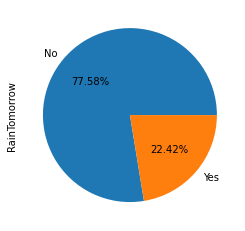

In [12]:
data['RainTomorrow'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

Based on the data, the percentage of the next-day rained is 21.91%, meanwhile the percentage of the next-day did not rain is 78,09%. \

**Conclusion**\
The data is imbalanced

In [14]:
import seaborn as sns

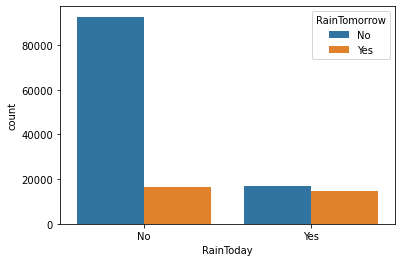

In [15]:
sns.countplot(x='RainToday',data=data,hue='RainTomorrow')
plt.show()

Based on the barplot above, if today had not rained, the possibility that the next day would not have rained is the highest.

In [16]:
yes=data[data['RainToday']=="Yes"]
no=data[data['RainToday']=='No']

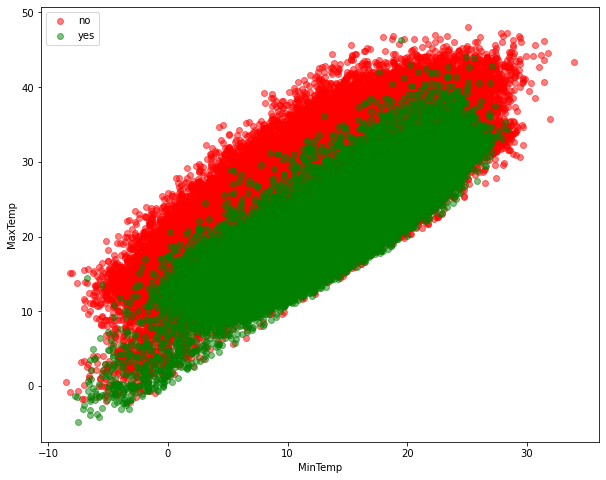

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(no["MinTemp"],no["MaxTemp"],color="red",label="no",alpha=0.5)
plt.scatter(yes["MinTemp"],yes["MaxTemp"],color='green',label="yes",alpha=0.5)
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")
plt.legend()
plt.show()

If today had rained, the maximum temperature tended to be higher.

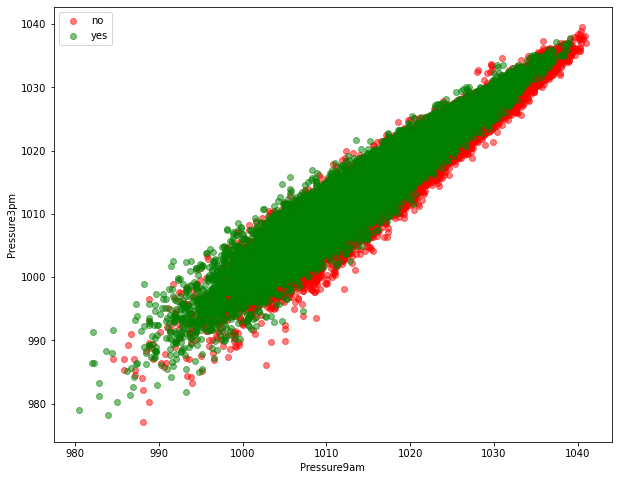

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(no["Pressure9am"],no["Pressure3pm"],color="red",label="no",alpha=0.5)
plt.scatter(yes["Pressure9am"],yes["Pressure3pm"],color='green',label="yes",alpha=0.5)
plt.xlabel("Pressure9am")
plt.ylabel("Pressure3pm")
plt.legend()
plt.show()

The pressure at 9 am has positive correlation with pressure at 3 pm.

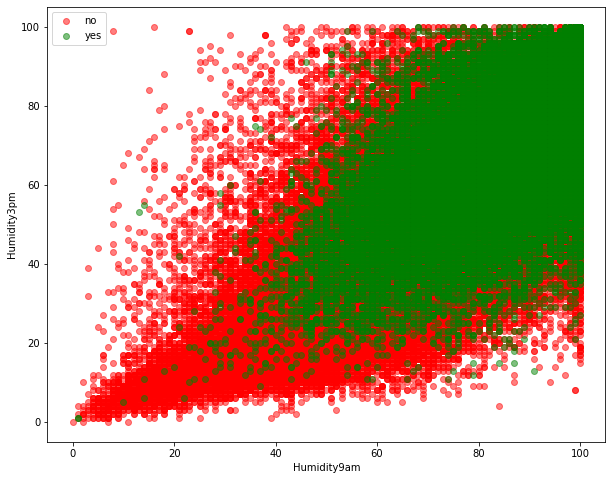

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(no["Humidity9am"],no["Humidity3pm"],color="red",label="no",alpha=0.5)
plt.scatter(yes["Humidity9am"],yes["Humidity3pm"],color='green',label="yes",alpha=0.5)
plt.xlabel("Humidity9am")
plt.ylabel("Humidity3pm")
plt.legend()
plt.show()

If today had rained, the humidity tended to be lower than if it had not rained.

### Correlation

In [20]:
correlation=data.corr()
print(correlation)

                MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp        1.000000  0.736555  0.103938     0.466993  0.072586   
MaxTemp        0.736555  1.000000 -0.074992     0.587932  0.470156   
Rainfall       0.103938 -0.074992  1.000000    -0.064351 -0.227549   
Evaporation    0.466993  0.587932 -0.064351     1.000000  0.365602   
Sunshine       0.072586  0.470156 -0.227549     0.365602  1.000000   
WindGustSpeed  0.177415  0.067615  0.133659     0.203021 -0.034750   
WindSpeed9am   0.175064  0.014450  0.087338     0.193084  0.005499   
WindSpeed3pm   0.175173  0.050300  0.057887     0.129400  0.053834   
Humidity9am   -0.232899 -0.504110  0.224405    -0.504092 -0.490819   
Humidity3pm    0.006089 -0.508855  0.255755    -0.390243 -0.629130   
Pressure9am   -0.450970 -0.332061 -0.168154    -0.270362  0.041970   
Pressure3pm   -0.461292 -0.427167 -0.126534    -0.293581 -0.019719   
Cloud9am       0.078754 -0.289370  0.198528    -0.183793 -0.675323   
Cloud3pm       0.021

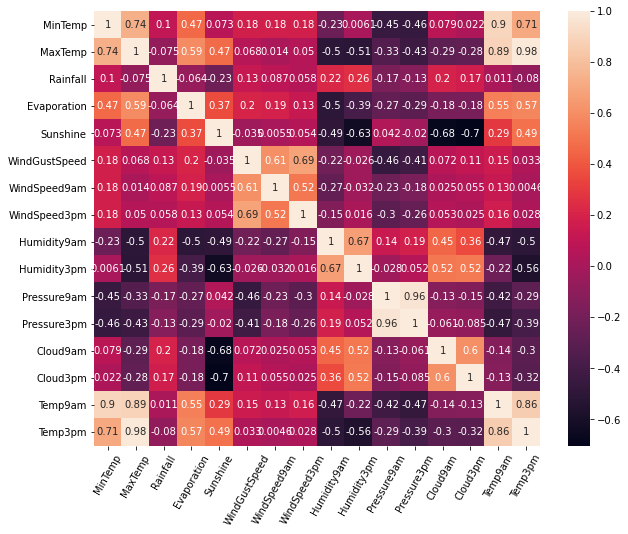

In [21]:
plt.figure(figsize=(10,8))
corrplot=sns.heatmap(correlation,annot=True)
corrplot.set_xticklabels(corrplot.get_xticklabels(),rotation=60)
plt.show()

## Pre-processing

### Checking Missing Value

In [22]:
print("The Percentage of Missing Value")
for col in data.columns:
    print(col+" : "+str(round(data[col].isnull().sum()/data.shape[0]*100,2))+"%")

The Percentage of Missing Value
Date : 0.0%
Location : 0.0%
MinTemp : 1.02%
MaxTemp : 0.87%
Rainfall : 2.24%
Evaporation : 43.17%
Sunshine : 48.01%
WindGustDir : 7.1%
WindGustSpeed : 7.06%
WindDir9am : 7.26%
WindDir3pm : 2.91%
WindSpeed9am : 1.21%
WindSpeed3pm : 2.11%
Humidity9am : 1.82%
Humidity3pm : 3.1%
Pressure9am : 10.36%
Pressure3pm : 10.33%
Cloud9am : 38.42%
Cloud3pm : 40.81%
Temp9am : 1.21%
Temp3pm : 2.48%
RainToday : 2.24%
RainTomorrow : 2.25%


### Dropping Columns that Contain Missing Value More than 30%

In [23]:
data.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   WindGustDir    135134 non-null  object        
 6   WindGustSpeed  135197 non-null  float64       
 7   WindDir9am     134894 non-null  object        
 8   WindDir3pm     141232 non-null  object        
 9   WindSpeed9am   143693 non-null  float64       
 10  WindSpeed3pm   142398 non-null  float64       
 11  Humidity9am    142806 non-null  float64       
 12  Humidity3pm    140953 non-null  float64       
 13  Pressure9am    130395 non-null  float64       
 14  Pressure3pm    130432 non-null  float64       
 15  

### Choosing Name of Numerical Variables

In [24]:
num=[col 
     for col in data.columns
        if data[col].dtype!='O']
num=num[1:]
print(num)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


### Choosing Name of Categorical Variables

In [25]:
cat=[col
    for col in data.columns
        if data[col].dtype=="O"]
print(cat)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


### Impute missing value in numerical variabel with its median

In [26]:
for value in [data]:
    for col in num:
        col_median=data[col].median()
        value[col].fillna(col_median, inplace=True)

data[num].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
dtype: int64

### Impute missing value in categorical variable with its mode

In [27]:
for value in [data]:
    for col in cat:
        col_mode=data[col].mode()[0]
        value[col].fillna(col_mode, inplace=True)
        
data[cat].isnull().sum()

Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

### Dropping Unnecessary Column

In [28]:
data.drop('Date',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   WindGustDir    145460 non-null  object 
 5   WindGustSpeed  145460 non-null  float64
 6   WindDir9am     145460 non-null  object 
 7   WindDir3pm     145460 non-null  object 
 8   WindSpeed9am   145460 non-null  float64
 9   WindSpeed3pm   145460 non-null  float64
 10  Humidity9am    145460 non-null  float64
 11  Humidity3pm    145460 non-null  float64
 12  Pressure9am    145460 non-null  float64
 13  Pressure3pm    145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
 16  RainToday      145460 non-null  object 
 17  RainTomorrow   145460 non-nul

### Detecting Outliers Using Z-Score

In [29]:
from scipy import stats

In [30]:
z=np.abs(stats.zscore(data._get_numeric_data()))
print(z)

[[0.18975691 0.0445749  0.20358073 ... 1.22301167 0.01350553 0.0191346 ]
 [0.75278601 0.26579424 0.27509664 ... 1.1179692  0.03301131 0.3840643 ]
 [0.11121166 0.35044037 0.27509664 ... 0.9829146  0.62222462 0.22349523]
 ...
 [1.06696699 0.51973264 0.27509664 ... 0.23257682 0.69575252 0.64681369]
 [0.68994982 0.53384032 0.27509664 ... 0.18755862 0.29260657 0.6322165 ]
 [0.42539264 0.08689797 0.27509664 ... 0.39764355 0.30811219 0.11224009]]


### Removing Outliers Observations

Data is considered as outlier if the z-score is bigger than 3.

In [31]:
data=data[(z<=3).all(axis=1)]
print(data.shape)

(138208, 18)


The new data shape after removing outliers is (138208,18)

### Resetting Old Index and Creating New Index

In [32]:
data=data.reset_index()
data.tail(20)

,index,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
138188,145440,Uluru,1.2,20.8,0.0,E,43.0,ESE,E,13.0,28.0,29.0,6.0,1029.8,1025.9,7.9,19.9,No,No
138189,145441,Uluru,0.5,21.7,0.0,E,43.0,ESE,ENE,13.0,20.0,27.0,19.0,1029.0,1025.0,9.5,20.5,No,No
138190,145442,Uluru,4.0,20.0,0.0,SE,39.0,ESE,ESE,13.0,26.0,58.0,26.0,1030.2,1026.7,9.1,19.0,No,No
138191,145443,Uluru,3.4,19.8,0.0,E,43.0,ESE,E,19.0,24.0,54.0,23.0,1031.8,1027.7,8.7,18.9,No,No
138192,145444,Uluru,3.2,18.6,0.0,E,46.0,ESE,E,15.0,20.0,56.0,29.0,1031.0,1027.2,8.2,17.4,No,No
138193,145445,Uluru,2.4,19.1,0.0,E,33.0,SE,E,17.0,17.0,59.0,24.0,1030.0,1026.2,8.0,18.8,No,No
138194,145446,Uluru,5.1,19.7,0.0,E,46.0,ESE,E,13.0,17.0,56.0,29.0,1028.5,1025.8,8.5,19.2,No,No
138195,145447,Uluru,2.5,21.2,0.0,ENE,35.0,ESE,E,17.0,19.0,57.0,32.0,1027.2,1023.0,10.3,20.3,No,No
138196,145448,Uluru,2.3,21.4,0.0,SE,22.0,SE,SSE,11.0,7.0,60.0,28.0,1026.9,1022.8,8.9,20.3,No,No
138197,145449,Uluru,2.6,22.5,0.0,S,19.0,S,E,9.0,7.0,59.0,24.0,1025.0,1021.4,8.8,22.1,No,No


In [33]:
data.drop('index',axis=1,inplace=True)

In [34]:
data.tail()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
138203,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
138204,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
138205,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No
138206,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No
138207,Uluru,14.9,22.6,0.0,W,39.0,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,15.0,20.9,No,No


### Label Encoding for Target Variable

In [35]:
Y=data.iloc[:,17]
Y

0         No
1         No
2         No
3         No
4         No
          ..
138203    No
138204    No
138205    No
138206    No
138207    No
Name: RainTomorrow, Length: 138208, dtype: object

In [36]:
Y.replace({'No':0,'Yes':1},inplace=True)
Y

0         0
1         0
2         0
3         0
4         0
         ..
138203    0
138204    0
138205    0
138206    0
138207    0
Name: RainTomorrow, Length: 138208, dtype: int64

### One-Hot Encoding for Categorical Predictor Variables

In [37]:
X=data.drop(['RainTomorrow'],axis=1)
X

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138203,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No
138204,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No
138205,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No
138206,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No


In [38]:
X=pd.get_dummies(X)
X

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,1,0,1,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,0,1,1,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,1,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,0,1,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138203,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,...,0,0,0,0,0,0,0,0,1,0
138204,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,...,0,0,0,0,0,0,0,0,1,0
138205,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,...,0,0,0,0,0,0,1,0,1,0
138206,7.8,27.0,0.0,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,...,0,0,0,0,0,0,0,0,1,0


### Scaling Data Using MinMaxScaler

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler=MinMaxScaler()
scaler.fit(X)
X_scaled=pd.DataFrame(scaler.transform(X), 
                      index=X.index,
                     columns=X.columns)

In [41]:
X_scaled

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.535620,0.492925,0.021898,0.527778,0.512821,0.545455,0.666667,0.212121,0.253102,0.295739,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.377309,0.544811,0.000000,0.527778,0.102564,0.500000,0.356322,0.242424,0.325062,0.313283,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.522427,0.558962,0.000000,0.555556,0.487179,0.590909,0.287356,0.292929,0.250620,0.335840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.424802,0.613208,0.000000,0.250000,0.282051,0.204545,0.367816,0.151515,0.498759,0.438596,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.643799,0.714623,0.036496,0.486111,0.179487,0.454545,0.793103,0.323232,0.330025,0.268170,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138203,0.255937,0.504717,0.000000,0.347222,0.333333,0.250000,0.436782,0.232323,0.672457,0.626566,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
138204,0.277045,0.549528,0.000000,0.222222,0.333333,0.204545,0.494253,0.202020,0.645161,0.596491,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
138205,0.324538,0.587264,0.000000,0.430556,0.230769,0.204545,0.459770,0.232323,0.583127,0.538847,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
138206,0.387863,0.589623,0.000000,0.305556,0.333333,0.159091,0.436782,0.232323,0.543424,0.531328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Model Building

### Splitting Data into Train and Test Using Repeated Holdout

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
xtrain,xtest,ytrain,ytest=train_test_split(X_scaled,Y,test_size=0.2,random_state=50)

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtrain,ytrain)

C:\Users\ilala\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8495559213501438

This is the accuracy score for data training

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
ypred_lr=lr.predict(xtest)
accuracy_score(ytest,ypred_lr)

0.8535923594530063

This is the accuracy score for data testing

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
lr_matrix=confusion_matrix(ytest,ypred_lr)
print(lr_matrix)

[[21005   998]
 [ 3049  2590]]


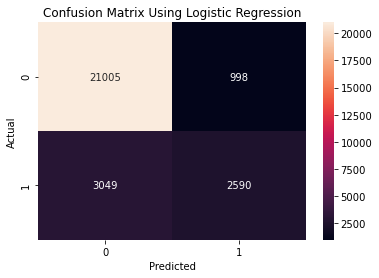

In [50]:
sns.heatmap(lr_matrix,annot=True,fmt='d')
plt.title("Confusion Matrix Using Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Note**\
TN = 21005 \
TP = 2590 \
FN = 3049 \
FP = 998

In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(ytest,ypred_lr))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22003
           1       0.72      0.46      0.56      5639

    accuracy                           0.85     27642
   macro avg       0.80      0.71      0.74     27642
weighted avg       0.84      0.85      0.84     27642



**INTERPRETATION**

**Accuracy**= 85%

**Precision**\
The percentage of predictions that the next day rained are correct is 72%.\
The percentage of predictions that the next day didnt rain are correct is 87%.

**Recall (Sensitivity)**\
Over the actual cases that the next day rained, the percentage of prediction that the next day rained is 46%.

**Specificity**\
Over the actual cases that the next day didnt rain, the percentage of prediction that the next day did not rain is 95%.

**F1-score**\
The percentage of positive predictions are correct is 56%.\
The percentage of negative predictions are correct is 91%.

### K-Nearest Neighbor

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain,ytrain)
knn.score(xtrain,ytrain)

0.8773583199175153

This is the accuracy score for data training

In [55]:
ypred_knn=knn.predict(xtest)
accuracy_score(ytest,ypred_knn)

0.8089139714926561

This is the accuracy score for data testing

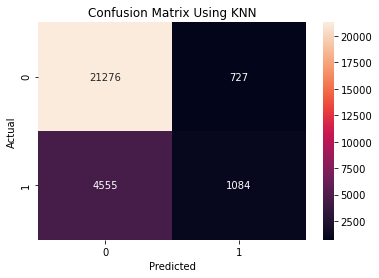

In [56]:
knn_matrix=confusion_matrix(ytest,ypred_knn)
sns.heatmap(knn_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix Using KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**Note**\
TN = 21276 \
TP = 1084 \
FN = 4555 \
FP = 727

In [57]:
print(classification_report(ytest,ypred_knn))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     22003
           1       0.60      0.19      0.29      5639

    accuracy                           0.81     27642
   macro avg       0.71      0.58      0.59     27642
weighted avg       0.78      0.81      0.77     27642



**INTERPRETATION**

**Accuracy**= 81%

**Precision**\
The percentage of predictions that the next day rained are correct is 60%.\
The percentage of predictions that the next day didnt rain are correct is 82%.

**Recall (Sensitivity)**\
Over the actual cases that the next day rained, the percentage of prediction that the next day rained is 19%.

**Specificity**\
Over the actual cases that the next day didnt rain, the percentage of prediction that the next day did not rain is 97%.

**F1-score**\
The percentage of positive predictions are correct is 29%.\
The percentage of negative predictions are correct is 89%.

### Decision Tree

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
cart=DecisionTreeClassifier()
cart.fit(xtrain,ytrain)
cart.score(xtrain,ytrain)

0.9999366893981875

This is the accuracy score for data training

In [60]:
ypred_cart=cart.predict(xtest)
accuracy_score(ytest,ypred_cart)

0.7919108602850734

This is the accuracy score for data testing

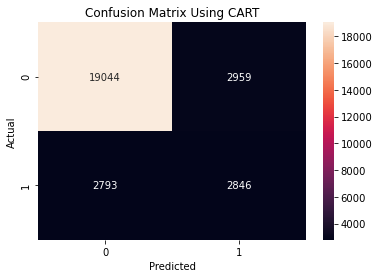

In [61]:
cart_matrix=confusion_matrix(ytest,ypred_cart)
sns.heatmap(cart_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix Using CART')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Note**\
TN = 19031 \
TP = 2849 \
FN = 2790 \
FP = 2972

In [62]:
print('Classification Report Using CART')
print(classification_report(ytest,ypred_cart))

Classification Report Using CART
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     22003
           1       0.49      0.50      0.50      5639

    accuracy                           0.79     27642
   macro avg       0.68      0.69      0.68     27642
weighted avg       0.79      0.79      0.79     27642



**INTERPRETATION**

**Accuracy**= 79%

**Precision**\
The percentage of predictions that the next day rained are correct is 49%.\
The percentage of predictions that the next day didnt rain are correct is 87%.

**Recall (Sensitivity)**\
Over the actual cases that the next day rained, the percentage of prediction that the next day rained is 51%.

**Specificity**\
Over the actual cases that the next day didnt rain, the percentage of prediction that the next day did not rain is 86%.

**F1-score**\
The percentage of positive predictions are correct is 50%.\
The percentage of negative predictions are correct is 87%.

### Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)

0.9999366893981875

This is the accuracy score for data training

In [65]:
ypred_rf=rf.predict(xtest)
accuracy_score(ytest,ypred_rf)

0.85796975616815

This is the accuracy score for data testing

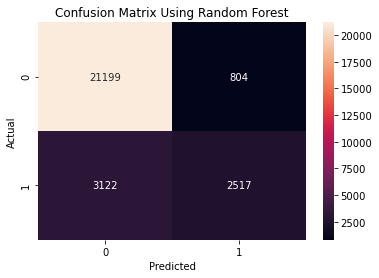

In [66]:
rf_matrix=confusion_matrix(ytest,ypred_rf)

sns.heatmap(rf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix Using Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Note**\
TN = 21171 \
TP = 2519 \
FN = 3120 \
FP = 832

In [67]:
print('Classification Report Using Random Forest')
print(classification_report(ytest,ypred_rf))

Classification Report Using Random Forest
              precision    recall  f1-score   support

           0       0.87      0.96      0.92     22003
           1       0.76      0.45      0.56      5639

    accuracy                           0.86     27642
   macro avg       0.81      0.70      0.74     27642
weighted avg       0.85      0.86      0.84     27642



**INTERPRETATION**

**Accuracy**= 86%

**Precision**\
The percentage of predictions that the next day rained are correct is 75%.\
The percentage of predictions that the next day didnt rain are correct is 87%.

**Recall (Sensitivity)**\
Over the actual cases that the next day rained, the percentage of prediction that the next day rained is 45%.

**Specificity**\
Over the actual cases that the next day didnt rain, the percentage of prediction that the next day did not rain is 96%.

**F1-score**\
The percentage of positive predictions are correct is 56%.\
The percentage of negative predictions are correct is 91%.

## Conclusion

Based on the classification report of 4 methods and considering that the data is imbalanced, **the best model for this case is using Random Forest method**. It may not have the highest recall but Random Forest has the highest precision, specifity, and f1-score.

Suprisingly, the logistic regression is good enough to be compared with random forest. Thus, logistic regression could be an alternative to be used for tradinional approach.

By using Random Forest, with 27642 record for the data testing, 3952 records were misclassified.